**Initialization**
* Setting up the Fastai and other necessary Libraries and Dependencies.

In [2]:
# Initializing the Fastai Environment.
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

* I use these 3 lines of code on top of my each notebook because it will help to prevent any problems while reloading or reworking on the Project or Problem. And the third line of code helps to make visualization within the Notebook.

In [3]:
# Initialization:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**Downloading the Dependencies**
* I have downloaded all the Libraries and Dependencies required for this Project in one particular cell.

In [4]:
# Importing Libraries and Dependencies
import nltk
import numpy as np  
from sklearn import decomposition
from scipy import linalg
from IPython.display import display
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [17]:
# !pip install jupyterthemes
# from jupyterthemes import jtplot
# jtplot.style(theme = "monokai", context = "notebook", ticks = True, grid = False)

**Getting the Data**
* Scikit Learn comes with a number of built in Datasets as well as loading utilities to load several standard external datasets. I will be using the Newsgroups Dataset. Here is [Scikit Learn Newsgroups Dataset](https://scikit-learn.org/stable/search.html?q=Newgroup).

In [5]:
# Importing Newsgroups Dataset.
from sklearn.datasets import fetch_20newsgroups

**Processing the Data**
* I have been curious to know the Features present in the Newsgroups Dataset and I found [information about Newsgroups Data](https://scikit-learn.org/stable/datasets/index.html#newsgroups-dataset). From here, I can conclude the Categorical Features present in the [Dataset](https://scikit-learn.org/stable/datasets/index.html#newsgroups-dataset) as well as unnecessary features present in the [Dataset](https://scikit-learn.org/stable/datasets/index.html#newsgroups-dataset).

In [7]:
# Categorical Data or Features present in the Dataset.
categories = ["alt.atheism", "talk.religion.misc", "comp.graphics", "sci.space"]

# Unnecessary Features or Data present in the Dataset.
remove = ("headers", "footers", "quotes")

# Data for Training and Testing.
newsgroups_train = fetch_20newsgroups(subset="train", categories=categories, remove=remove)               # Training Dataset.
newsgroups_test = fetch_20newsgroups(subset="test", categories=categories, remove=remove)                 # Testing Dataset.

# Observing the Dataset.
f"Shape of Training Data {newsgroups_train.filenames.shape}", f"Shape of Testing Data {newsgroups_test.target.shape}"

('Shape of Training Data (2034,)', 'Shape of Testing Data (1353,)')

* **Exploring the Data**

In [8]:
# Observing the Data.
print("\n".join(newsgroups_train.data[:4]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

**Stopwords Stemming and Lemmatization**

* Stopwords : The extremely common words which would appear to be of little value in helping to select the documents matching a user needs are excluded from the vocabulary entirely and these words are called Stopwords.

In [10]:
# Observing the Stopwords
from sklearn.feature_extraction import stop_words
sorted(list(stop_words.ENGLISH_STOP_WORDS))[:10]                 # Printing the 10 Stopwords.

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost']

* Stemming and Lemmatization : Stemming and Lemmatization both generate the root form of words. Stemming and Lemmatization is language dependent.

In [13]:
# Stemming and Lemmatization:
from nltk import stem

wnl = stem.WordNetLemmatizer()                          # Word Net Lemmatizer.
porter = stem.porter.PorterStemmer()                    # Porter Stemming.

# Example:
wordlist = ["organize", "organizes", "orginizing"]
display([wnl.lemmatize(word) for word in wordlist])     # WordNet Lemmatizer.
display([porter.stem(word) for word in wordlist])       # Porter Stemming.

['organize', 'organizes', 'orginizing']

['organ', 'organ', 'orgin']

**Processing the Data**
* I will be using Scikit Learn CountVectorizer and TfidfVectorizer for processing the Data.

In [20]:
# Processing the Data with CountVectorizer and TfidfVectorizer.
vectorizer = CountVectorizer(stop_words="english")                         # Count Vectorization.
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
vocab = np.array(vectorizer.get_feature_names())

# Observing the shape of vectors which is recently obtained.
f"Shape of vectors is {vectors.shape}", f"Shape of vocab is {vocab.shape}"

('Shape of vectors is (2034, 26576)', 'Shape of vocab is (26576,)')

**Singular Value Decomposition (SVD)**
* The words that appear most frequently in one topic would appear less frequently in the other, otherwise that word wouldn't make a good choice to separate out the two topics. Therefore, the topics are Orthogonal. The SVD algorithm factorizes a matrix into one matrix with orthogonal columns and one with orthogonal rows along with diagonal matrix which contains the relative importance of each factor. SVD is an exact decomposition since the matrices it creates are big enough to fully cover the original matrix. 
* Basic Implementations:
  - Semantic Analysis.
  - Collaborative Filtering or Recommendations System.
  - Data Compression.
  - Principal Component Analysis (PCA).

In [21]:
# Singular Value Decomposition(SVD)
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

# Observing the result.
display(U.shape, s.shape, Vh.shape)

CPU times: user 1min 29s, sys: 5.92 s, total: 1min 35s
Wall time: 49 s


(2034, 2034)

(2034,)

(2034, 26576)

**Observing the Topics**
* Observing the Topics using Singular Value Decomposition (SVD).

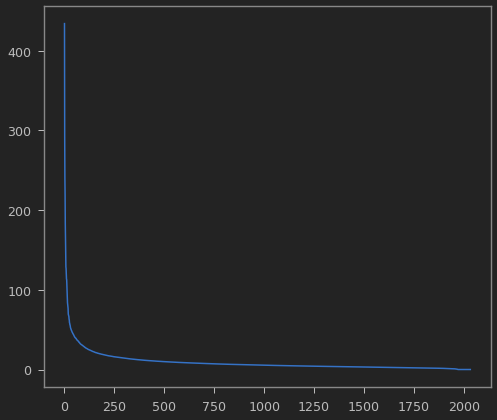

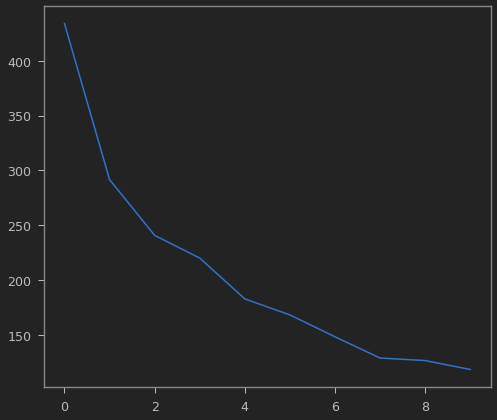

In [22]:
# Plotting the s.
plt.plot(s)
plt.figure()

# Plotting only certain values of s.
plt.plot(s[:10])

In [23]:
# Observing the Topics using SVD.
num_words = 10                                                              # Maximum number of words in each Topics.
def show_topics(a):
  """ Showing the topics using orthogonal columns and orthogonal rows. """
  top_words = lambda x: [vocab[i] for i in np.argsort(x)[:-num_words-1:-1]]
  topic_words = [top_words(b) for b in a]
  return [" ".join(t) for t in topic_words]

# Observing the topics obtained.
show_topics(Vh[:10])                                                        # Obtaining the 10 Topics from the Data.

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative salvadorans autotheism',
 'jpeg gif file color quality image jfif format bit version',
 'graphics edu pub mail 128 3d ray ftp send image',
 'jesus god matthew people atheists atheism does graphics religious said',
 'image data processing analysis software available tools display tool user',
 'god atheists atheism religious believe religion argument true atheist example',
 'space nasa lunar mars probe moon missions probes surface earth',
 'image probe surface lunar mars probes moon orbit mariner mission',
 'argument fallacy conclusion example true ad argumentum premises false valid',
 'space larson image theory universe physical nasa material star unified']

**NonNegative Matrix Factorization (NMF)**
* Non Negative Matrix Factorization (NMF) is a factorization or constrain of non negative dataset. NMF is non exact factorization that factors into one short positive matrix. Implementations of NMF :
  - Face Decompositions.
  - Collaborative Filtering or Movie Recommendations.
  - Audio Source Separation.

In [24]:
# Implemenation of  NMF in Topic Modeling.
num = 5                                                     # Number of Topics.

clf = decomposition.NMF(n_components=num, random_state=1)   # Instantiating NMF.
W1 = clf.fit_transform(vectors)                             # Implementation NMF.
H1 = clf.components_

# Observing the Topics.
show_topics(H1)

['jpeg image gif file color images format quality version files',
 'edu graphics pub mail 128 ray ftp send 3d com',
 'space launch satellite nasa commercial satellites year market data earth',
 'jesus god people matthew atheists does atheism said just believe',
 'image data available software processing ftp edu analysis images display']

**Topic Frequency Inverse Document Frequency (TFIDF)**
* TFIDF is a way to normalize the term counts by taking into account how often they appear in a document and how long the document is and how common or rare the document is.

In [33]:
# Observing the Data.
newsgroups_train.data[10:21]

["a\n\nWhat about positional uncertainties in S-L 1993e?   I assume we know where\nand what Galileo is doing within a few meters.   But without the\nHGA,  don't we have to have some pretty good ideas, of where to look\nbefore imaging?  If the HGA was working,  they could slew around\nin near real time (Less speed of light delay).  But when they were\nimaging toutatis????  didn't someone have to get lucky on a guess to\nfind the first images?   \n\nAlso, I imagine S-L 1993e will be mostly a visual image.  so how will\nthat affect the other imaging missions.  with the LGA,  there is a real\ntight allocation of bandwidth.   It may be premature to hope for answers,\nbut I thought i'd throw it on the floor.",
 "I would like to program Tseng ET4000 to nonstandard 1024x768 mode by\nswitching to standard 1024x768 mode using BIOS and than changing some\ntiming details (0x3D4 registers 0x00-0x1F) but I don't know how to\nselect 36 MHz pixel clock I need. The BIOS function selects 40 MHz.\n\nIs t

In [25]:
# Implementation of TFIDF.
vectorizer_tfidf = TfidfVectorizer(stop_words="english")
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data)

# Implementation of NMF with TFIDF.
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

# Observing the Finalized Topics.
show_topics(H1)

['people don think just like objective say morality know moral',
 'graphics thanks files image file program windows know format ftp',
 'space nasa launch shuttle orbit moon lunar earth station data',
 'ico bobbe tek beauchaine bronx manhattan sank queens vice blew',
 'god jesus bible believe christian atheism does belief faith christians']

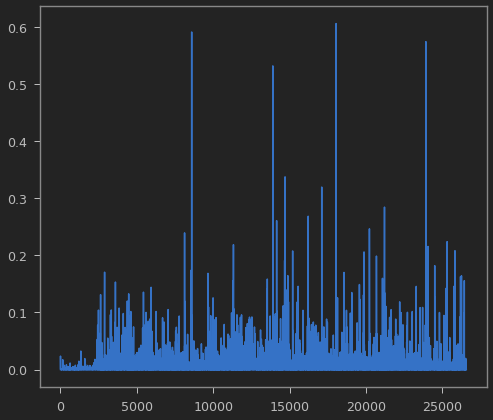

In [26]:
# Plotting the Results.
plt.plot(clf.components_[0])

**Timing Comparison**
* Randomized SVD from Facebook Library fbca.

In [32]:
# Implementation of fbca.
# !pip install fbpca
import fbpca
%time U, s, Vh = fbpca.pca(vectors, 10)

CPU times: user 2.57 s, sys: 497 ms, total: 3.07 s
Wall time: 1.66 s
